In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글폰트 지정
plt.rcParams['axes.unicode_minus']=False # 한글폰트 사용 시 -기호 깨지는 문제 해결

In [4]:
df_가격 = pd.read_csv('C:\\Users\\acorn\\Downloads\\채소사는날\\식품예측 데이터\\일별소매가\\품목_소매가_전부.csv', encoding = 'cp949')
df_출하량 = pd.read_csv('C:\\Users\\acorn\\Downloads\\채소사는날\\식품예측 데이터\\출하량_가락\\품목_출하량_전부.csv', encoding = 'cp949')


# df_가격 컬럼 정리
df_가격.drop(columns = ['index'], inplace = True)
df_가격 = df_가격[['구분', '품목', '평균']]

# 컬럼명 수정
df_가격 = df_가격.rename(columns={'구분':'날짜', '전통시장':'전통시장가격', '유통업체':'유통업체가격', '평균':'평균가격', '품목':'품목명'})

# 형변환
df_가격['날짜'] = pd.to_datetime(df_가격['날짜'])

df_가격['평균가격'] = df_가격['평균가격'].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')

df_가격 = df_가격.sort_values(['품목명', '날짜'], ascending=True)



# 품목별 단위 가격 계산 함수
def calculate_1kg_price(row):
    if row['품목명'] == '감자':  # 100g
        return row['평균가격'] * 10
    elif row['품목명'] == '건고추':  # 600g
        return row['평균가격'] * 10 / 6
    elif row['품목명'] == '무':  # 무는 한 개에 대략 1kg
        return row['평균가격']
    elif row['품목명'] == '배추':  # 1포기
        return row['평균가격'] * 3 / 10  # 표준규격 3포기 한 망에 10kg
    elif row['품목명'] == '시금치':  # 100g
        return row['평균가격'] * 10
    elif row['품목명'] == '쌀':  # 20kg
        return row['평균가격'] / 20
    elif row['품목명'] == '애호박':  # 1개 대략 300g
        return row['평균가격'] * 10 / 3
    elif row['품목명'] == '양배추':  # 1포기
        return row['평균가격'] * 10 / 11  # 양배추 1통은 일반적으로 1100g 전후의 상품이 선별되며, 1.5kg 내외의 상품도 있습니다
    elif row['품목명'] == '오이':  # 10개
        return row['평균가격'] / 2  # 오이 한 개 무게는 대략 200g -> 5개 1kg
    elif row['품목명'] == '콩나물':  # 340g
        return row['평균가격'] * 100 / 34
    elif row['품목명'] == '새송이버섯':  # 100g
        return row['평균가격'] * 10
    elif row['품목명'] == '팽이':  # 150g
        return row['평균가격'] * 100 / 15
    else:
        return row['평균가격']  # 기본적으로 변환하지 않은 값을 반환

# '단위가격' 컬럼 생성
df_가격['단위가격'] = df_가격.apply(calculate_1kg_price, axis=1)
df_가격['단위가격'] = df_가격['단위가격'].round(1)

# df_출하량
# 컬럼명 수정
df_출하량 = df_출하량.rename(columns={'DATE':'날짜', '총반입량':'가락시장반입량'})
# 날짜 datetime형 변환
df_출하량['날짜'] = pd.to_datetime(df_출하량['날짜'].astype(str), format='%Y-%m-%d')
# 컬럼 선택
df_반입량 = df_출하량[['날짜', '가락시장반입량']]


# 가격과 출하량 합치기
df_가격_출하량_전체 = pd.merge(df_가격, df_출하량, on=['날짜', '품목명'], how='left')

df_가격_출하량 = df_가격_출하량_전체[['날짜', '품목명', '평균가격', '단위가격', '가락시장반입량']]
df_가격_출하량

,날짜,품목명,평균가격,단위가격,가락시장반입량
0,2014-01-02,감자,202.0,2020.0,NaN
1,2014-01-03,감자,208.0,2080.0,376.0
2,2014-01-04,감자,208.0,2080.0,262.0
3,2014-01-05,감자,208.0,2080.0,NaN
4,2014-01-06,감자,281.0,2810.0,285.0
...,...,...,...,...,...
65115,2024-12-01,팽이,529.0,3526.7,NaN
65116,2024-12-02,팽이,529.0,3526.7,NaN
65117,2024-12-03,팽이,530.0,3533.3,NaN
65118,2024-12-04,팽이,534.0,3560.0,NaN


In [3]:
df_데이터합 = pd.read_excel('C:\\Users\\acorn\\Downloads\\채소사는날\\식품예측 데이터\\데이터 합.xlsx')

# df_데이터합
# 컬럼명 수정
df_데이터합 = df_데이터합.rename(columns={'분류':'날짜', 'GDP(10억원단위)':'GDP', '시간급':'최저시급', '자동차용경유':'경유가격'})
# 컬럼 선택
df_데이터합 = df_데이터합[['날짜', 'GDP', '한은금리', '최저시급', '경유가격']]
df_데이터합

,날짜,GDP,한은금리,최저시급,경유가격
0,2014-01-02,442669.9,2.5,5210,1706.27
1,2014-01-03,442669.9,2.5,5210,1707.15
2,2014-01-04,442669.9,2.5,5210,1707.61
3,2014-01-05,442669.9,2.5,5210,1707.56
4,2014-01-06,442669.9,2.5,5210,1707.80
...,...,...,...,...,...
3910,2024-09-26,572413.3,3.5,9860,1429.96
3911,2024-09-27,572413.3,3.5,9860,1427.87
3912,2024-09-28,572413.3,3.5,9860,1425.01
3913,2024-09-29,572413.3,3.5,9860,1423.72


In [6]:
# merge
df = pd.merge(df_가격_출하량, df_데이터합, on='날짜', how='left')
df

,날짜,품목명,평균가격,단위가격,가락시장반입량,GDP,한은금리,최저시급,경유가격
0,2014-01-02,감자,202.0,2020.0,NaN,442669.9,2.5,5210.0,1706.27
1,2014-01-03,감자,208.0,2080.0,376.0,442669.9,2.5,5210.0,1707.15
2,2014-01-04,감자,208.0,2080.0,262.0,442669.9,2.5,5210.0,1707.61
3,2014-01-05,감자,208.0,2080.0,NaN,442669.9,2.5,5210.0,1707.56
4,2014-01-06,감자,281.0,2810.0,285.0,442669.9,2.5,5210.0,1707.80
...,...,...,...,...,...,...,...,...,...
65115,2024-12-01,팽이,529.0,3526.7,NaN,NaN,NaN,NaN,NaN
65116,2024-12-02,팽이,529.0,3526.7,NaN,NaN,NaN,NaN,NaN
65117,2024-12-03,팽이,530.0,3533.3,NaN,NaN,NaN,NaN,NaN
65118,2024-12-04,팽이,534.0,3560.0,NaN,NaN,NaN,NaN,NaN


품목명                 감자           건고추          고구마          깐마늘           당근  \
날짜                                                                            
2014-01-02  202.000000  10018.000000  3717.000000  6746.000000  2625.000000   
2014-01-03  208.000000  10018.000000  3816.000000  6693.000000  2606.000000   
2014-01-04  208.000000  10018.000000  3816.000000  6693.000000  2606.000000   
2014-01-05  208.000000  10018.000000  3816.000000  6693.000000  2606.000000   
2014-01-06  281.000000  10018.000000  3895.000000  6518.000000  2663.000000   
...                ...           ...          ...          ...          ...   
2024-12-01  345.333333  18458.333333  5182.333333  8726.333333  6734.666667   
2024-12-02  346.000000  18457.000000  5288.000000  8872.000000  6753.000000   
2024-12-03  351.000000  18218.000000  5318.000000  8878.000000  6755.000000   
2024-12-04  350.000000  18218.000000  5313.000000  8957.000000  6742.000000   
2024-12-05  356.000000  18457.000000  4802.000000  9

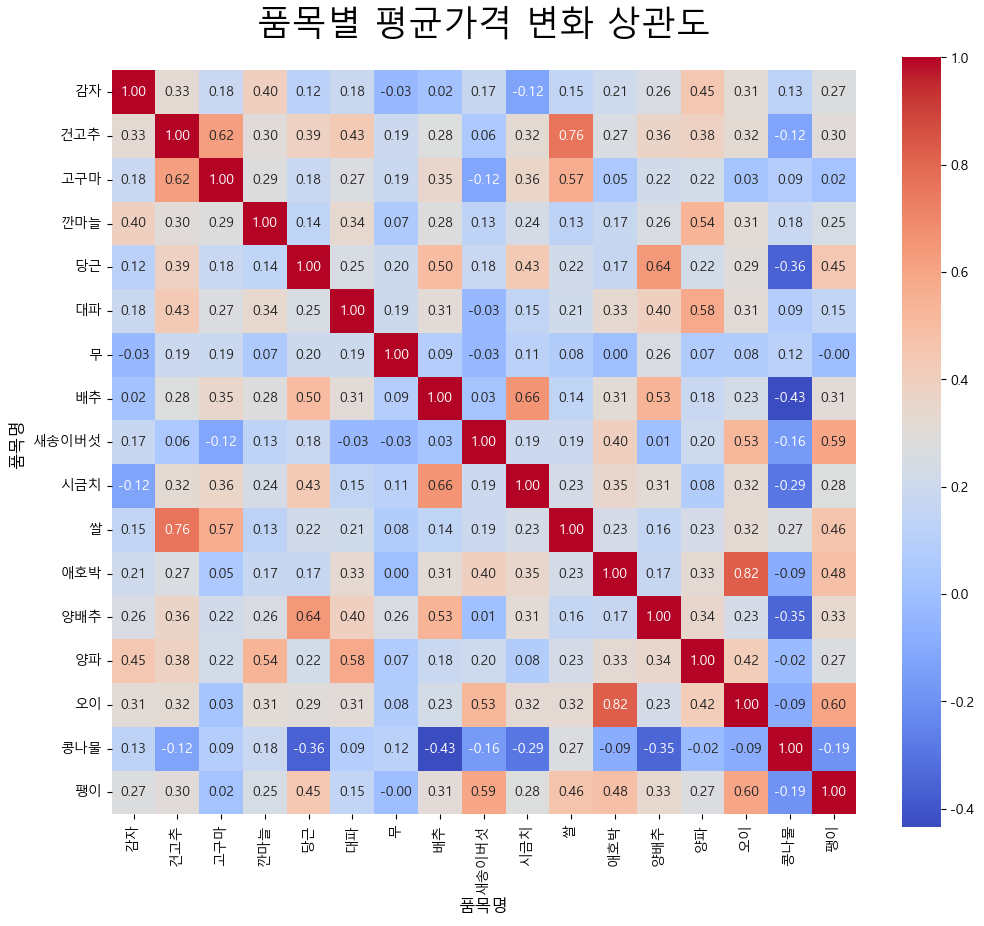

In [7]:
# '날짜'를 인덱스로 설정
df_pivot = df.pivot_table(index='날짜', columns='품목명', values='평균가격')

# 결측값 처리 (선형 보간)
df_pivot = df_pivot.interpolate(method='linear', limit_direction='forward')

print(df_pivot)

# 품목별 상관계수 계산
corr_matrix = df_pivot.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# 그래프 설정
plt.title('품목별 평균가격 변화 상관도', fontsize=25, pad=25)
plt.xlabel('품목명', fontsize=12)
plt.ylabel('품목명', fontsize=12)

# 저장 및 출력
plt.savefig('품목별_평균가격_상관도.png', dpi=200)
plt.show()

# 감자 ~ 양파
# 건고추 ~ 고구마, 쌀
# 깐마늘 ~ 양파
# 당근 ~ 배추, 양배추
# 대파 ~ 양파
# 배추 ~ 시금치, 양배추
# 양파 ~ 깐마늘, 대파